###  Energy Generation Time Series
##### U.S. Electricity Generation (https://www.kaggle.com/datasets/ravishah1/electricity-generation-time-series)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
import plotly.graph_objs as go
from itertools import product

In [2]:
us_el_selected=pd.read_csv('us_el_selected.csv',index_col=[0])
us_el_selected['Date']=pd.to_datetime(us_el_selected['Date'])

In [3]:
us_el_selected = us_el_selected.loc[:,:'United States : all sectors']

In [4]:
us_el_selected.head()

,Date,United States : all sectors
0,2001-01-01,332493
1,2001-02-01,282940
2,2001-03-01,300707
3,2001-04-01,278079
4,2001-05-01,300492


In [5]:
us_el_selected.tail(15)

,Date,United States : all sectors
240,2021-01-01,350796
241,2021-02-01,326223
242,2021-03-01,312285
243,2021-04-01,292504
244,2021-05-01,318859
245,2021-06-01,373754
246,2021-07-01,404749
247,2021-08-01,413353
248,2021-09-01,348201
249,2021-10-01,319638


In [6]:
us_el_selected.rename(columns = {'Date':'ds', 'United States : all sectors':'y'}, inplace = True)

In [7]:
us_el_selected.head()

,ds,y
0,2001-01-01,332493
1,2001-02-01,282940
2,2001-03-01,300707
3,2001-04-01,278079
4,2001-05-01,300492


In [8]:
train = us_el_selected.loc[us_el_selected['ds']<'2021-01-01']
test = us_el_selected.loc[us_el_selected['ds']>='2021-01-01']

In [9]:
train.tail(20)

,ds,y
220,2019-05-01,330423
221,2019-06-01,352988
222,2019-07-01,410038
223,2019-08-01,401430
224,2019-09-01,360518
225,2019-10-01,320352
226,2019-11-01,315849
227,2019-12-01,338402
228,2020-01-01,341850
229,2020-02-01,319550


In [10]:
model = Prophet(interval_width=0.95)
model.fit(train)

10:33:58 - cmdstanpy - INFO - Chain [1] start processing
10:33:58 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=15, freq='MS')
forecast = model.predict(future)

In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
245,2021-06-01,361468.548069,343915.385864,378055.130202
246,2021-07-01,401269.794863,384526.315105,418117.905666
247,2021-08-01,395872.482908,379514.199695,413023.192724
248,2021-09-01,341730.061924,323838.026776,358674.456149
249,2021-10-01,316980.177133,301279.243074,332656.681263
250,2021-11-01,307886.312522,291518.472707,324709.400460
251,2021-12-01,344431.181833,327501.734687,360241.692170
252,2022-01-01,355147.611927,337514.743266,373089.997930
253,2022-02-01,311833.079117,295628.966350,327835.742655
254,2022-03-01,319726.192415,303229.399025,337006.803137


In [13]:
mape =mean_absolute_percentage_error(test['y'], forecast.loc[forecast['ds']>='2021-01-01','yhat'])
r2_score = r2_score(test['y'], forecast.loc[forecast['ds']>='2021-01-01','yhat'])
mae = mean_absolute_error(test['y'], forecast.loc[forecast['ds']>='2021-01-01','yhat'])
mse = mean_squared_error(test['y'], forecast.loc[forecast['ds']>='2021-01-01','yhat'])

In [14]:
print('mape : %5f' %mape)
print('r2_score : %5f' %r2_score)
print('MAE : %5f' %mae)
print('MSE : %5f' %mse)

mape : 0.027354
r2_score : 0.888855
MAE : 9520.595586
MSE : 128057923.268590


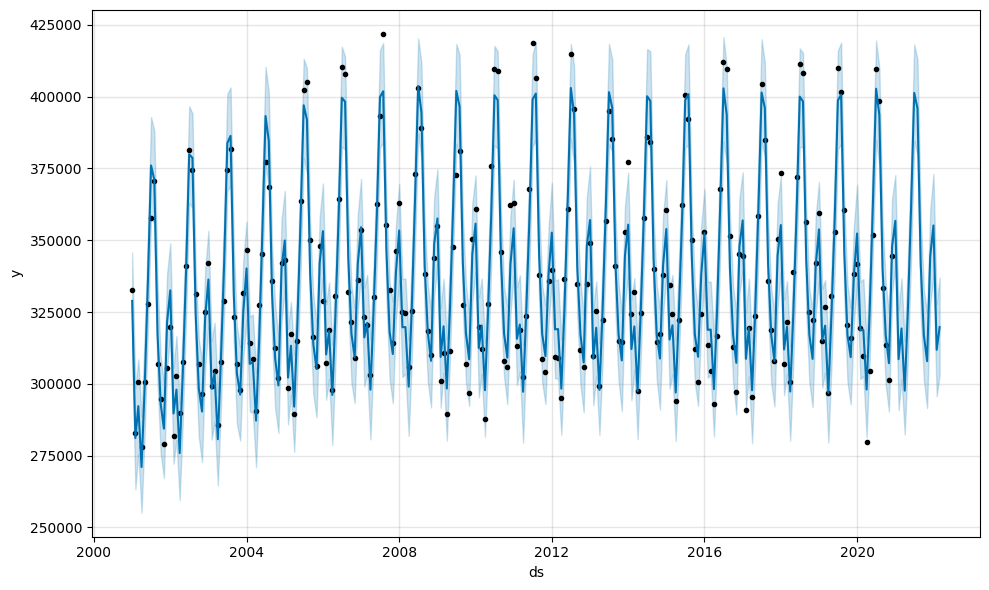

In [15]:
fig=model.plot(forecast)

''

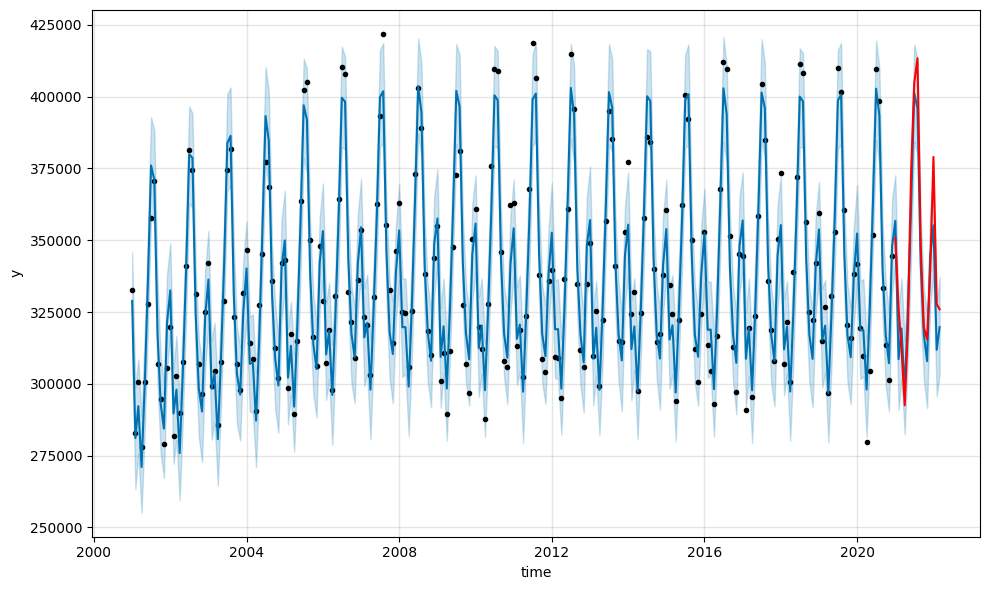

In [16]:
fig = model.plot(forecast)
ax = fig.gca()
ax.plot(test['ds'],test['y'],color="red")
ax.set_xlabel('time')
;

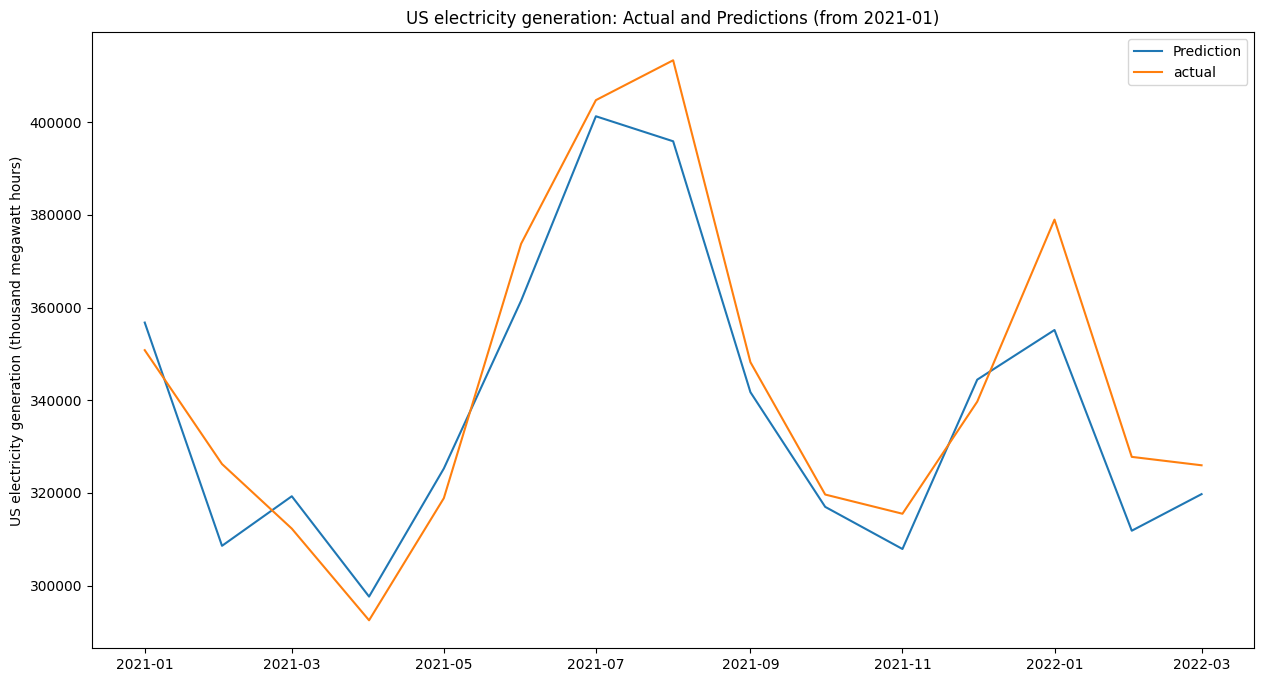

In [17]:
plt.figure(figsize=(15,8))
# plt.plot(us_el_selected.index, us_el_selected['United States : all sectors'], label='Actual')
plt.plot(forecast.loc[forecast['ds']>='2021-01-01','ds'],forecast.loc[forecast['ds']>='2021-01-01','yhat'],label='Prediction')
plt.plot(test['ds'],test['y'],label='actual')
plt.title('US electricity generation: Actual and Predictions (from 2021-01)')
plt.ylabel('US electricity generation (thousand megawatt hours)')
plt.legend()
plt.show()

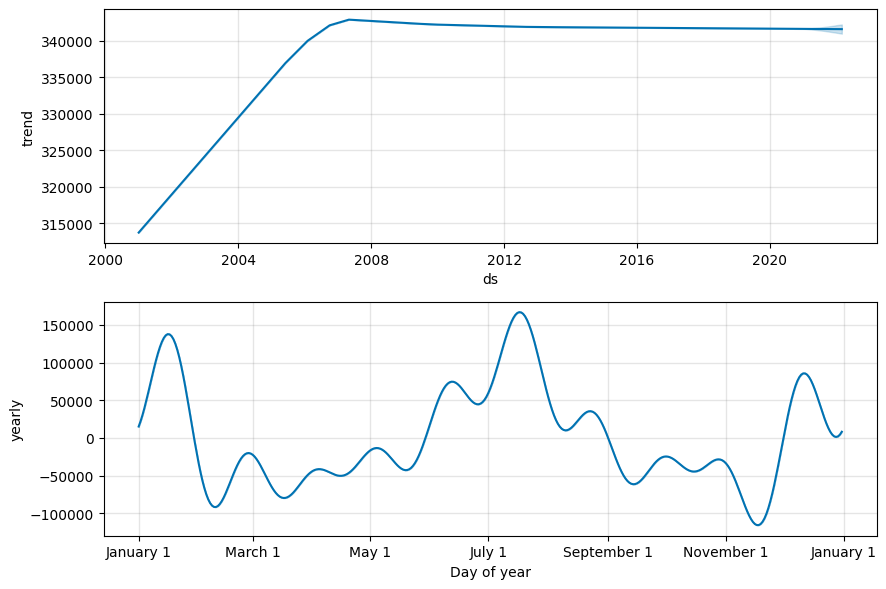

In [18]:
model.plot_components(forecast)
plt.show();

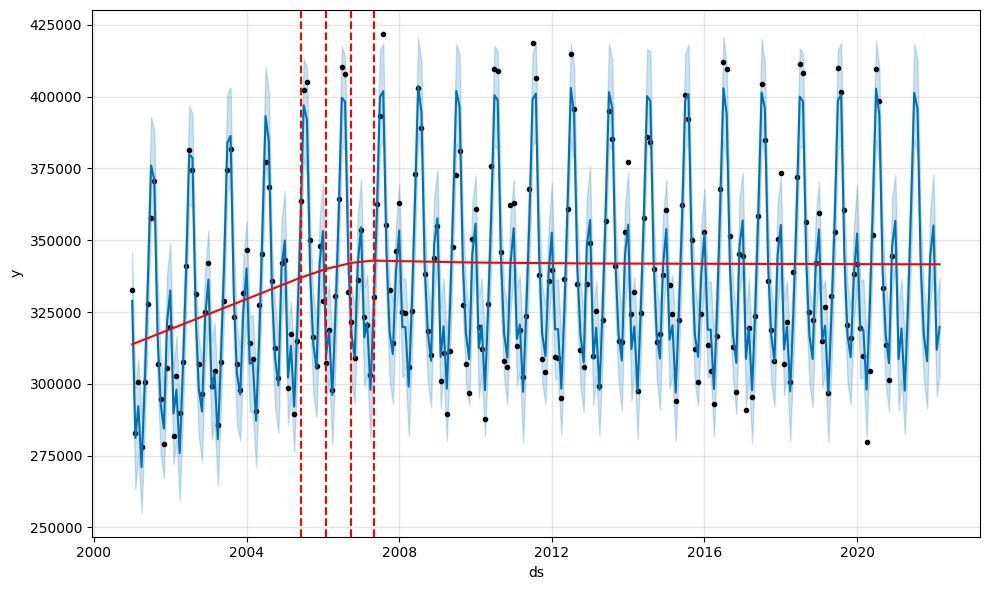

In [19]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast);

Source/Reference:

https://www.kaggle.com/datasets/ravishah1/electricity-generation-time-series

https://medium.com/grabngoinfo/time-series-forecasting-of-bitcoin-prices-using-prophet-1069133708bc

https://towardsdatascience.com/time-series-forecasting-with-facebooks-prophet-in-10-minutes-part-2-1f558ccc3e83

https://medium.com/grabngoinfo/hyperparameter-tuning-and-regularization-for-time-series-model-using-prophet-in-python-9791370a07dc

